> # ANN - Keras -1

## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Preprocessing and Exploratory Data Analysis

In [3]:
df.drop(['ID'],inplace=True,axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [5]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

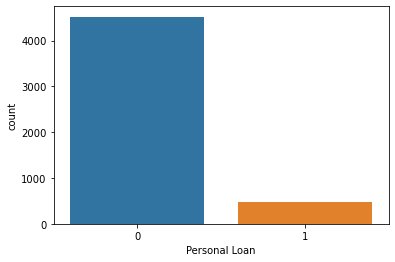

In [6]:
sns.countplot(x='Personal Loan',data=df)

In [7]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])

In [8]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,Young,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,Adult,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,Adult,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,Adult,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,Adult,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [11]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

## Train-Test Split

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

## Build model

In [15]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()

keras.add(Dense(12,activation='relu')) ## input

keras.add(Dense(8,activation='relu')) #softplus
keras.add(Dense(6,activation='relu'))

keras.add(Dense(1,activation='sigmoid'))  ## output

## Fit the model

In [16]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 2s 3ms/step - loss: 238.0145 - accuracy: 0.8365
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 11.1138 - accuracy: 0.8339
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 13.3940 - accuracy: 0.8285
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 11.9175 - accuracy: 0.8347
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 9.5088 - accuracy: 0.8256
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 6.0528 - accuracy: 0.8392
Epoch 7/20
150/150 [==============================] - 0s 3ms/step - loss: 6.5304 - accuracy: 0.8397
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 5.7320 - accuracy: 0.8379
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 2.4526 - accuracy: 0.8595
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 7.4274 - accuracy: 0

## Predict values and accuracy score

In [18]:
# Train Accuracy
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.9027
90.2666687965393


In [19]:
y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 2ms/step


In [20]:
# Test Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9096

> # ANN - Keras - 2

In [29]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [33]:
y_train[0]

5

In [34]:
# scaling the pixel values between 0 and 1 
x_train = x_train/255
x_test = x_test/255

In [35]:
# y values have to be labelled
# 1 - [0,1,0,0,0,0,0,0,0,0]

In [36]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
x_train.shape
# 60,000 images in the training set, each with a height and width of 28 pixels.

(60000, 28, 28)

In [39]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Flatten(input_shape=(28, 28)))  # input
model.add(Dense(256,activation='relu')) # 256 neurons
model.add(Dropout(0.2)) 
# Dropout is a regularization technique that randomly drops out or ignores some of the neurons during training to avoid overfitting
model.add(Dense(10,activation='softmax')) # 0-9 - 10 outputs

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
# other optimizers - sgd,rmsprop
# other loss - categorical_crossentropy, mse(regression problems)
# other metrics - mse,mae,recall,..

In [43]:
model.fit(x_train,y_train,batch_size=20,epochs=10)

Epoch 1/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0519 - accuracy: 0.9231
Epoch 2/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0244 - accuracy: 0.9660
Epoch 3/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0184 - accuracy: 0.9756
Epoch 4/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0152 - accuracy: 0.9805
Epoch 5/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0131 - accuracy: 0.9835
Epoch 6/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0115 - accuracy: 0.9859
Epoch 7/10
3000/3000 [==============================] - 29s 10ms/step - loss: 0.0101 - accuracy: 0.9882
Epoch 8/10
3000/3000 [==============================] - 31s 10ms/step - loss: 0.0093 - accuracy: 0.9893
Epoch 9/10
3000/3000 [==============================] - 30s 10ms/step - loss: 0.0084 - accuracy: 0.9911
Epoch 10/10
3000/3000 [==============================] - 28s 9ms/step 

In [44]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [45]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.0155 - accuracy: 0.9813


In [46]:
accuracy

0.9812999963760376

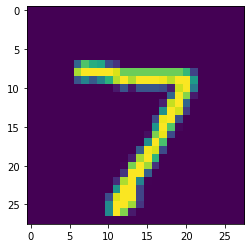

In [47]:
# testing the model
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [48]:
pred0 = model.predict(x_test[0])

1/1 [==============================] - 0s 271ms/step


In [49]:
import numpy as np
np.argmax(pred0)

7

In [50]:
pred0.argmax()

7

> # ANN - Keras - 3

In [51]:
import keras
from keras.datasets import fashion_mnist

In [52]:
fashion_mnist.load_data?

In [53]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [54]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [55]:
x_train[0].max()

255

In [56]:
x_train = x_train/255
x_test = x_test/255

In [57]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [58]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [60]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout

In [61]:
model = Sequential()

In [62]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [63]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [64]:
model.fit(x_train,y_train,batch_size=30,epochs=10)

Epoch 1/10
2000/2000 [==============================] - 23s 10ms/step - loss: 0.0944 - accuracy: 0.8158
Epoch 2/10
2000/2000 [==============================] - 19s 9ms/step - loss: 0.0703 - accuracy: 0.8598
Epoch 3/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0648 - accuracy: 0.8715
Epoch 4/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0608 - accuracy: 0.8799
Epoch 5/10
2000/2000 [==============================] - 18s 9ms/step - loss: 0.0583 - accuracy: 0.8838
Epoch 6/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.0561 - accuracy: 0.8896
Epoch 7/10
2000/2000 [==============================] - 14s 7ms/step - loss: 0.0543 - accuracy: 0.8942
Epoch 8/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0528 - accuracy: 0.8949
Epoch 9/10
2000/2000 [==============================] - 19s 9ms/step - loss: 0.0513 - accuracy: 0.8989
Epoch 10/10
2000/2000 [==============================] - 21s 11ms/step - 

In [65]:
model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


array([[8.2894686e-10, 4.0511795e-12, 3.6875491e-13, ..., 6.8232400e-04,
        7.3251870e-11, 9.9919611e-01],
       [1.8509410e-06, 1.2291168e-16, 9.9999750e-01, ..., 1.4606412e-18,
        1.5510142e-11, 2.6822982e-20],
       [2.1012023e-19, 1.0000000e+00, 2.6558189e-23, ..., 4.5871791e-31,
        1.0245600e-19, 2.6635850e-27],
       ...,
       [4.2657192e-08, 3.9466404e-13, 1.6047588e-10, ..., 1.3921860e-15,
        9.9999988e-01, 1.3746439e-16],
       [7.1658416e-16, 1.0000000e+00, 9.9758818e-16, ..., 3.5021007e-18,
        9.2747027e-16, 2.7314399e-16],
       [8.5386532e-08, 2.6802836e-13, 4.4889883e-10, ..., 1.4926324e-07,
        1.9945105e-08, 3.6448489e-09]], dtype=float32)

In [66]:
loss, accuracy = model.evaluate(x_train,y_train)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0463 - accuracy: 0.9061


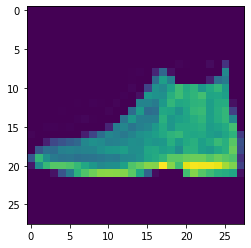

In [67]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])

In [68]:
pred0 = model.predict(x_test[0])

1/1 [==============================] - 1s 780ms/step


In [69]:
pred0.argmax()

9

> # ANN - From Scratch 

In [70]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [71]:
# Load the Iris dataset
iris = load_iris()

In [72]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [73]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
X = iris.data
y = iris.target

In [75]:
# Preprocess the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = np.eye(len(np.unique(y)))[y]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Define the architecture of the neural network
input_size = 4
hidden_size = 5
output_size = 3

In [78]:
# Initialize the weights and biases of the neural network
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

In [79]:
# Define the activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [80]:
# Define the loss function (cross-entropy)
def cross_entropy(y_pred, y_true):
    return -np.sum(y_true * np.log(y_pred))
# cross_entropy = -sum(y_true*log(y_pred))

In [81]:
# Train the neural network
learning_rate = 0.01
num_epochs = 1000

In [82]:
for epoch in range(num_epochs):
    # Forward pass
    hidden = sigmoid(np.dot(X_train, W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    loss = cross_entropy(output, y_train)
    
    # Backward pass
    doutput = output - y_train
    dhidden = np.dot(doutput, W2.T) * (hidden * (1 - hidden))
    dW2 = np.dot(hidden.T, doutput)
    db2 = np.sum(doutput, axis=0)
    dW1 = np.dot(X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [83]:
# Evaluate the neural network on the test set
hidden = sigmoid(np.dot(X_test, W1) + b1)
output = sigmoid(np.dot(hidden, W2) + b2)
preds = np.argmax(output, axis=1)
labels = np.argmax(y_test, axis=1)
accuracy = np.mean(preds == labels)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9666666666666667
